# Workshop 5 Drill
This drill aims to give you an opportunity to practice deep learning on an interesting problem. 

For this drill, we will use PyTorch to build our deep learning architecture

## What are we solving today?
For this drill, we will be using the Fashion MNIST dataset to classify fashion images. 

Link for more information: https://github.com/zalandoresearch/fashion-mnist

This dataset is a classic dataset that is used to benchmark deep architectures. 

In [1]:
#imports 
from torchvision import datasets, transforms


import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
# your python files imported
import load_dataset
import model
import trainer

## Step 1: Load in the dataset

Before we can do anything, we need to be able to load in the Fashion MNIST dataset. Luckily, the `datasets` library within the `torchvision` package contains the Fashion MNIST dataset. Load in both the train and test datasets. You also are able to specify the transformation to apply to both the train and test sets. Fill out the `load_dataset.py` file. 

In [6]:
# Test that your implementation from load_dataset.py works
trainloader, testloader = load_dataset.load_fashion_mnist()

# Examine a sample
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


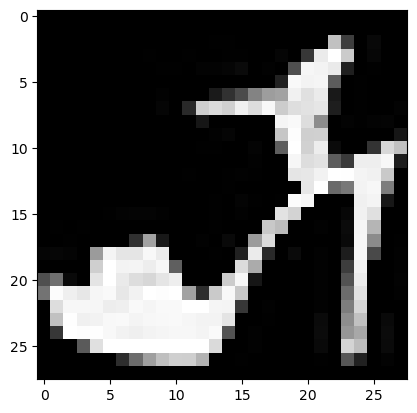

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

## Step 2: Build the Model
Now that we are able to load in the Fashion MNIST as torch Dataloaders, we get to the fun part!

We can now construct a deep learning model that can be used to classify images of fashion objects. 

In `model.py`, you will build the architecture shown below (in the `MyBasicModel` class). Convolutional Neural Networks are very popular for image classification 
![Fashion MNIST Image](dl_arch.PNG) (Credit: https://towardsdatascience.com/build-a-fashion-mnist-cnn-pytorch-style-efb297e22582)



Hint: Linear layers might be helpful for you to build the architecture

In [5]:
# Test Basic model
import model
basic_model = model.MyBasicModel()
print(repr(basic_model)) #check that your architecture matches up to the diagram

MyBasicModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


## Step 3: Train the model
Use `trainer.py` to fill in the function to train your deep learning model. You will need to configure the following:

* Loss Function: CELoss
* Optimizer: Adam
* Epoch count: 30


In [6]:
# Use Pytorch to configure the loss function, optimizer, epoch count

loss_function = nn.CrossEntropyLoss() # CELoss
optimizer = optim.Adam(basic_model.parameters(), lr=1e-3)
epochs = 30

In [8]:
results = trainer.run_dl_model(trainloader, testloader, basic_model, optimizer,loss_function, epochs)
results

Epoch: 0
Train loss: 659.7352861464024
Test loss: 83.20292422175407
Train Accuracy: 73.42999999999999
Test Accuracy: 79.58
Epoch: 1
Train loss: 437.8924125880003
Test loss: 68.57513973116875
Train Accuracy: 82.78166666666667
Test Accuracy: 84.73
Epoch: 2
Train loss: 378.74756260216236
Test loss: 63.38403418660164
Train Accuracy: 85.16333333333334
Test Accuracy: 85.48
Epoch: 3
Train loss: 339.58463798463345
Test loss: 61.42665381729603
Train Accuracy: 86.80166666666666
Test Accuracy: 85.38
Epoch: 4
Train loss: 321.36191253364086
Test loss: 56.770705699920654
Train Accuracy: 87.395
Test Accuracy: 86.69
Epoch: 5
Train loss: 302.5765891894698
Test loss: 55.83265545964241
Train Accuracy: 88.05166666666666
Test Accuracy: 86.83
Epoch: 6
Train loss: 289.51449420303106
Test loss: 55.32146781682968
Train Accuracy: 88.51666666666667
Test Accuracy: 87.16000000000001
Epoch: 7
Train loss: 276.97971181571484
Test loss: 51.94788944721222
Train Accuracy: 89.06833333333334
Test Accuracy: 87.660000000000

{'train_loss': [659.7352861464024,
  437.8924125880003,
  378.74756260216236,
  339.58463798463345,
  321.36191253364086,
  302.5765891894698,
  289.51449420303106,
  276.97971181571484,
  267.885514318943,
  258.79834796488285,
  249.12413833290339,
  241.40740954875946,
  234.17310653999448,
  227.0492989346385,
  221.528473906219,
  215.85102279484272,
  206.90826473385096,
  203.01202422380447,
  198.08620107918978,
  192.35012432932854,
  186.47141272202134,
  180.4032496958971,
  178.86316156759858,
  172.8761522769928,
  170.9907287582755,
  164.74730700999498,
  162.14337189123034,
  157.5553662031889,
  152.87753115408123,
  148.3325045509264],
 'test_loss': [83.20292422175407,
  68.57513973116875,
  63.38403418660164,
  61.42665381729603,
  56.770705699920654,
  55.83265545964241,
  55.32146781682968,
  51.94788944721222,
  49.823908157646656,
  51.52923735976219,
  48.960657216608524,
  48.17776009440422,
  48.61282820999622,
  48.720847234129906,
  47.917082257568836,
  47.

## Step 4: Having even more fun!
So, I gave you one of many possible CNN architectures to train your Fashion MNIST classifier. Another architecture you can try is a pretrained DL architecture called ResNet (Residual Neural Network). The key building block in ResNet is what's called a Basic Block. Below is an comparison of ResNet architecturse (which is what you will use in this exercise):
![Resnet](resnet.png)


For this part of the exercise, you will be using Resnet 50 architecture. However, you don't have to build it from scratch. Pytorch allows you to import a pretrained version of the architecture for your use. 

Check out: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html#torchvision.models.resnet50

We can't just import resnet 50 and we're good. We have to tweak ResNet a bit for Fashion MNIST. Below are the fixes you should make:

* The Fashion MNIST uses gray-scale images, so you should take the `conv1` layer in resnet-50 and set `in_channels=1`

* The last layer in Resnet-50 is a fully connected layer (ie: `Linear` layer). We want to fix the last `Linear` layer in ResNet such that the output is a `1x10` vector (so you need to worry about `out_features` for the last `Linear` layer). 

Implement Resnet-50 for Fashion MNIST in `model.py` under the `FashionResNet50` class

In [3]:
#check your resnet architecture
resnet_model = model.FashionResNet50()
print(resnet_model)

c:\Users\Jesse\anaconda3\envs\PYTORCH\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Jesse\anaconda3\envs\PYTORCH\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FashionResNet50(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [4]:
# Loss function: cross‑entropy
resnet_loss_function = nn.CrossEntropyLoss()
# Optimizer: Adam (attach to the ResNet’s parameters)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=1e-3)
# Number of training epochs
resnet_epochs = 30

In [8]:
#train resnet model (this part can take a while, so run this trainer using CUDA (torch.cuda())!)
results = trainer.run_dl_model(trainloader, testloader, resnet_model, resnet_optimizer, resnet_loss_function, resnet_epochs)
results

Epoch: 0
Train loss: 539.4105661511421
Test loss: 74.31425428390503
Train Accuracy: 80.10833333333333
Test Accuracy: 82.61
Epoch: 1
Train loss: 338.91578683257103
Test loss: 55.85645855218172
Train Accuracy: 86.75166666666667
Test Accuracy: 86.92
Epoch: 2
Train loss: 306.1775109991431
Test loss: 50.78810288012028
Train Accuracy: 88.285
Test Accuracy: 88.13
Epoch: 3
Train loss: 318.460780993104
Test loss: 48.93907452374697
Train Accuracy: 88.43833333333333
Test Accuracy: 88.71
Epoch: 4
Train loss: 282.0658318474889
Test loss: 121.8038381934166
Train Accuracy: 89.39166666666667
Test Accuracy: 76.57000000000001
Epoch: 5
Train loss: 302.57160123437643
Test loss: 47.889462150633335
Train Accuracy: 88.45333333333333
Test Accuracy: 88.75
Epoch: 6
Train loss: 256.23175342381
Test loss: 43.95853876322508
Train Accuracy: 89.98166666666667
Test Accuracy: 89.72
Epoch: 7
Train loss: 226.58194891363382
Test loss: 45.37250925600529
Train Accuracy: 91.29166666666667
Test Accuracy: 89.42
Epoch: 8
Train

{'train_loss': [539.4105661511421,
  338.91578683257103,
  306.1775109991431,
  318.460780993104,
  282.0658318474889,
  302.57160123437643,
  256.23175342381,
  226.58194891363382,
  209.87654873728752,
  222.37350045889616,
  280.87301760166883,
  286.1895728483796,
  213.66230712085962,
  273.8707827106118,
  285.22735967487097,
  223.3418390788138,
  196.87057239934802,
  174.85017730668187,
  195.0888720843941,
  170.71103305742145,
  148.01177853904665,
  139.06694577261806,
  127.60723769105971,
  118.4081218354404,
  109.7984828390181,
  112.96497997175902,
  90.35677300393581,
  104.55255057383329,
  88.36987936962396,
  71.06509739160538],
 'test_loss': [74.31425428390503,
  55.85645855218172,
  50.78810288012028,
  48.93907452374697,
  121.8038381934166,
  47.889462150633335,
  43.95853876322508,
  45.37250925600529,
  42.174229480326176,
  48.53823448717594,
  69.85238799452782,
  45.52999860048294,
  42.21219501644373,
  46.21113395690918,
  43.42906827479601,
  44.2861466

Feel free to play around with parameters for optimizer, loss function, epochs for resnet and basic CNN model. For basic CNN model, you can play around with the layer parameters and architecture. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8488eaf2-ff92-4a43-b350-fdb8e01ce644' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>